<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: **Elena Ingraham**

***

This assignment is due on Moodle by **5 PM on Friday June 22**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
from scipy.stats import poisson
import random
import math
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [10 points] Problem 1 

**Part A**:  Your friend is teaching you how to bat in baseball by pitching balls to you as you try to hit them. Sadly, you are not very good. On any given pitch, the probability that you hit the ball is only about 0.05. Your friend needs to know when she'll be able to go home, so she wants to estimate the distribution of the number of balls she will need to throw by the time you get your 10th hit. Luckily, you are better at Data Science than you are at baseball!

Describe **(i)** what distribution could be used to model the system, **(ii)** define any relevant parameters for that distribution and their values, and **(iii)** define the random variable $X$ that follows that distribution, including all values that $X$ can take on.

**(i).** **Since we are hitting until our first success this is a geometric distribution. 
ii. The indpendent probability of hitting the ball is 1/20  so X = .05**. X can take on any values < 1.

**Part B:**  You are a data-driven transportation engineer investigating the effect that a new stoplight has on city traffic.  The stoplight is located in a high-traffic area, near a large commercial district in your city's downtown, so you want to estimate the distribution of number of cars per hour that pass through the intersection.  You conduct a field study by observing the stoplight all day on Monday and Tuesday one week, and determine that on average 80 cars pass under the stoplight per hour.

Describe **(i)** what distribution could be used to model the system, **(ii)** define any relevant parameters for that distribution and their values, and **(iii)** define the random variable $X$ that follows that distribution, including all values that $X$ can take on. Additionally, **(iv)** do you think it would be appropriate to use the data you collected and the distribution from parts **(i-iii)** to model the arrival of cars at this stoplight on a weekly timescale? Why or why not?

**B.** A poissan distribution could be used to model this distribution. The slice of time, an hour, and the average number of cars are the relevant parameters. X = can  take on any values that allow for the sum to be less that 1. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [15 points] Problem 2

In this problem you'll get some extra practice writing simple simulations. 

A young boy and an old woman are playing tic tac toe. Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The old woman plays first and randomly places an X in an open square. The boy plays next, and places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, each of the two players' probabilities of winning.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely do not be afraid to write helper functions that are called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an X or an O on an free square, or (iii) check if someone has won the game. Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [68]:
def  ticTacToe():
    board = ['1A','2A','3A','1B','2B', '3B', '1C','2C', '3C']
    takenSpots = []
    boySpots = []
    oldLadySpots = []
    firstLady = []
    lastLady =[]
    firstBoy = []
    lastBoy = []
    winner = []
    spot = '1A'
    boya = 0
    boyb = 0 
    boyc = 0
    ladya = 0
    ladyb = 0 
    ladyc = 0
    boyone =0 
    boytwo = 0
    boythree = 0
    ladyone =0 
    ladytwo = 0
    ladythree = 0
    turn = 1
    winner = "no one"
    while turn < (9):
        spot = random.choice(board)
        if spot not in takenSpots:
            if (turn % 2 == 0):
                turn +=1
                boySpots = np.append(boySpots, spot)
                firstBoy = [w[0] for w in boySpots]
                lastBoy = [w[1] for w in boySpots]
                takenSpots = np.append(takenSpots, spot)
                if(turn  >= 3):
                    for i in range(len(boySpots)-1):
                        if (lastBoy[i] == 'A'):
                            boya += 1
                        elif (lastBoy[i] == 'B'):
                            boyb += 1
                        elif (lastBoy[i] == 'C'):
                            boyc += 1
                        if (firstBoy[i] == 1):
                            boyone += 1
                        elif (firstBoy[i] == 2):
                            boytwo += 1
                        elif (firstBoy[i] == 3):
                            boythree += 1
                        if(boya ==3 | boyb ==3 | boyc ==3 | boyone == 3 | boytwo == 3 |boythree ==3):
                            winner = 'Boy'
                            return winner 
                       # if (set(['1C','2B','3A']).issubset(boySpots)|set(['A1','2B','3C']).issubset(boySpots)): #all(x in two for x in one)
                        if(('1C' in boySpots)& ('2B' in boySpots) & ('3A' in boySpots)):
                            winner = 'Boy'
                            return winner 
                        if(('3C' in boySpots) & ('2B' in boySpots) & ('1A' in boySpots)):
                            winner = 'Boy'
                            return winner 
                        
            if((turn % 2)!= 0):
                turn += 1
                oldLadySpots = np.append(oldLadySpots, spot)
                firstLady = [w[0] for w in oldLadySpots]
                lastLady = [w[1] for w in oldLadySpots]
                #print(firstLady)
                takenSpots = np.append(takenSpots, spot)
                if(turn >= 3): 
                    #print(firstLady)
                    for i in range(len(firstLady)-1):
                        if (lastLady[i] == 'A'):
                            ladya += 1
                        elif (lastLady[i] == 'B'):
                            ladyb += 1
                        elif (lastLady[i] == 'C'):
                            ladyc += 1
                        if (firstLady[i] == 1):
                            ladyone += 1
                        elif (firstLady[i] == 2):
                            ladytwo += 1
                        elif (firstLady[i] == 3):
                            ladythree += 1
                        if(ladya >=3 | ladyb >=3 | ladyc >=3 | ladyone >= 3 | ladytwo >= 3 |ladythree >=3):
                            winner = 'Lady'
                            return winner 
                        if(('1C' in oldLadySpots)& ('2B' in oldLadySpots) & ('3A' in oldLadySpots)):
                            winner = 'Lady'
                            return winner 
                        if(('3C' in oldLadySpots) & ('2B' in oldLadySpots) & ('1A' in oldLadySpots)):
                            winner = 'Lady'
                            return winner 
                            
            else:
                spot = random.choice(board)
    return winner
def tic_tac_game(n):
    i = 0 
    winner = []
    lady_array = []
    boy_array = []
    draw_array = []
    for i in range(n):
        winner = np.append(winner, ticTacToe())
    for i in range(len(winner)-1):
        if (winner[i] == 'Lady'):
            lady_array = np.append(lady_array, 1)
        elif (winner[i] == 'Boy'):
            boy_array = np.append(boy_array, 1)
     #   elif (winner[i] == 'no one'):
      #      draw_array = np.append(draw_array, 1)
    boy_prob = (boy_array.sum()/n)
    lady_prob = (lady_array.sum()/n)
    #draw_prob = (draw_array.sum()/n)
    print("Boy Probability", boy_prob)
    print("Lady Probability", lady_prob)
    print(winner)
    return winner
tic_tac_game(10000)  
            #if() if the first character of every element in the Spots array & (1,2,3) winner = boy/lady 

Boy Probability 0.3313
Lady Probability 0.3897
['Lady' 'Boy' 'Lady' ..., 'Lady' 'no one' 'no one']


array(['Lady', 'Boy', 'Lady', ..., 'Lady', 'no one', 'no one'],
      dtype='<U32')

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [20 points] Problem 3


<img src="http://uploads.neatorama.com/images/posts/870/98/98870/1508255088-0.jpg" style="width: 260px;"/>

Suppose you are baking pies and want to model the probability with which each pie you bake is delicious.  Let $X$ be a random variable representing the **Deliciousness Index (DI)** of a pie, on a scale of $0$ (least delicious) to $\pi$ (a most excellent pie).  The probability density function for $X$ is:

$$
f(x) = \begin{cases}
         c\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

**A.** C = 1/PI for f(x) to be a valid density function.

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  What should $F(\pi)$ equal?  Be sure to **justify** this answer. Then, verify this answer by calculating $F(\pi)$ from the cdf you derive.

**B.** Since the PDF is the derivative of the CDF, we need to integrate the given PDF function to find the CDF, which gives us 1/PI *sin(x)+ (x/PI). F(pi) should equal 1 because the total area, which represents the total probability, is concentrated from zero to PI and zero everywhere else. 

**Part C**: It is a well-known fact that pies with Deliciousness Index at least 2 are classified as **Quite Tasty**. Use the cdf you computed in **Part B** to find the probability that a single pie you bake is Quite Tasty. 

**C.** Since it is at least 2, we need to compute the integral of the PDF from 2 to PI, which would give us (1/PI * sin(x) + (x/$\pi$)) and evaluate it from 2 to $\pi$ which gives us (1/$\pi$ * sin($\pi$) + ($\pi$/$\pi$))- (1/$\pi$ * sin(2) + (2/$\pi$)) = 1 - (.01 + .636) = .354 or 35.4% percent chance of at least 2 cookies being quite tasty.

**Part D**: What is the expected Deliciousness Index of any given pie you bake?  Calculate this by hand, using techniques you may or may not need to dust off from Calculus 2. Once you have a final analytic solution (in terms of $\pi$), *then* you should obtain and report an approximate decimal answer.

**D.** The expected deliciousness index of any given pie is 1. Since the expected value should be the average value of the CDF. In order to get the average value of the CDF we must integrate again giving us the equation: 1/ $\pi$(-cos(x)+(1/2)x^2) which we multiply by 1/$\pi$ since the bounds are from 0 to $\pi$ and 1/($\pi$-0) gives us 1/$\pi$ which all works out to the average value = 1 

**Part E:**  The symmetric version of our probability density function is $g(x) = c(\cos{(x)}+1), -\pi \leq x \leq \pi$.  $g(x)$ sometimes referred to as the "raised cosine" probability density function. It is often useful as an alternative to a normal distribution.
Name one key difference between the raised cosine and a normal distribution centered at $x=0$.  Describe a situation that would be appropriate to model using one of those probability density functions, but not the other.


**E.** The raised cosine function is skewed if it is centered at zero so it would be better in situtations that a probability is skewed whereas the normal distribution has no skewing. Weight could be a situation where the data is skewed and the normal distribution doesn't work. Or maybe an exam where scores never really dip below a certain percentage and the raised cosine fits better. A situation where the normal distribution could be temperatures where the peak is basically dead center and the rest of the temperatures are evenly situated on either side. 

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
### [20 points] Problem 4

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. So, for example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledger) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ ($0 \leq x \leq 9$) and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [13]:
def pmf_natural(a):
    results = []
    digits = []
    result = 0
    for i in range(len(a)):
        digits = [ int(i) for i in str(a[i])]
        for i in range(len(digits)):
            if (0 < digits[i] <= 9):
                result = np.log10((digits[i]+1)/digits[i])
                results = np.append(results, result)
            else:
                results = np.append(results, 0)
    print(results)
    return results 
test = [1,5,3,4,9,2,8,6,7]
trial1 = pmf_natural(test)
        

[ 0.30103     0.07918125  0.12493874  0.09691001  0.04575749  0.17609126
  0.05115252  0.06694679  0.05799195]


**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

[ 0.30103     0.17609126  0.12493874  0.09691001  0.07918125  0.06694679
  0.05799195  0.05115252  0.04575749]


Text(0.5,1,'PMF and Discrete Distribution')

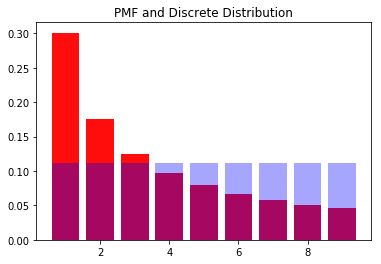

In [37]:
discrete_distr = [float(1/9),float(1/9),float(1/9),float(1/9),float(1/9),float(1/9),float(1/9),float(1/9),float(1/9)]
yval = [1,5,3,4,9,2,3,6,8,7]
graph = pmf_natural([1,2,3,4,5,6,7,8,9])
plt.bar([1,2,3,4,5,6,7,8,9], height = graph, color = 'red', alpha = .95)
plt.bar([1,2,3,4,5,6,7,8,9], height = discrete_distr, color = 'blue', alpha = .35)
plt.title('PMF and Discrete Distribution')

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(x)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 2 and at most 3.

What interesting fact do your results tell you about the relative frequencies of low versus high leading digits, that occur naturally?

In [15]:
def cdf_natural(n):
    bounds = [1,2,3,4,5,6,7,8,9]
    sub_array= [1]
    result = 0
    i = 0
    for i in range(len(bounds)):
        if(bounds[i] <= n):
            sub_array = np.append(sub_array, bounds[i])
            #results = np.append(results, result)
        else:
            break
    result = round(pmf_natural(sub_array).sum()-.30103, 3)
    print(result)
    return result
trial1 = cdf_natural(2)
trial1 = cdf_natural(3)
    

[ 0.30103     0.30103     0.17609126]
0.477
[ 0.30103     0.30103     0.17609126  0.12493874]
0.602


**Part D**: The data in [tax_data.txt](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jigc0s4atj24lr) contains the taxable income for individuals in 1978 (available linked here, and on Piazza). Use Pandas and the information from this problem to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words.

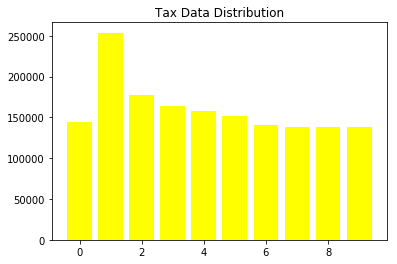

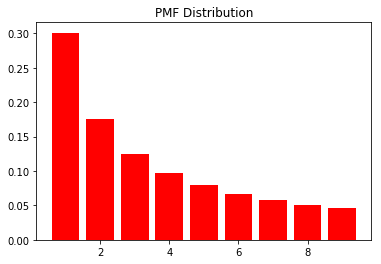

In [38]:
web_path = 'https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jigc0s4atj24lr'
file_path = web_path 
# Load the data into a DataFrame 
dfTaxes = pd.read_csv(file_path)
taxes = (dfTaxes['taxIncomes'].str.replace('\t', ''))
taxes = taxes.values
tax = ''.join(str(e) for e in taxes)
digits = list(tax)
#print(digits)
#print('sum = ', taxes.sum())
i = 0 
counts = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(digits)):
    if(digits[i] == '0'):
        counts[0] += 1
    if(digits[i] == '1'):
        counts[1] += 1
    if(digits[i] == '2'):
        counts[2] += 1
    if(digits[i] == '3'):
        counts[3] += 1
    if(digits[i] == '4'):
        counts[4] += 1
    if(digits[i] == '5'):
        counts[5] += 1
    if(digits[i] == '6'):
        counts[6] += 1
    if(digits[i] == '7'):
        counts[7] += 1
    if(digits[i] == '8'):
        counts[8] += 1
    if(digits[i] == '9'):
        counts[9] += 1
#print(digits)
#print(counts)
plt.bar([0,1,2,3,4,5,6,7,8,9], height = counts, color = 'yellow')
plt.title('Tax Data Distribution')
plt.show()
plt.bar([1,2,3,4,5,6,7,8,9], height = graph, color = 'red')
plt.title('PMF Distribution')
plt.show()
#for i in range(len(taxes)):
 #       digits = [ int(i) for i in str(taxes[i])]
#pmf_natural(digits)
#print(taxes)/

**D.** The yellow graph that represents the distribution of digits in the tax data clearly show a different distribution than the pmf previously computed (shown below). This shows that the data is most likely fraudulent as it does not follow the natural distribution. 

<br>

---
<a/ id='p5'></a>
[Back to top](#top)
### [35 points] Problem 5

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

<img src="http://www.panoston.com/wp-content/uploads/2017/08/store-line-1.jpg" style="width: 300px;"/>

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You stand at the front of the store watching the two lines and tabulating the inter-arrival times for each line and find the following:
* John's line checks-out an average of 2 customers per five-minute time slice,
* the self check-out machine checks-out an average of 2.5 customers per five-minute time slice **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per five-minute time slice if the machine is freezing up, and
* the self check-out machine froze up for 2 of the 10 five-minute time slices you observed it.

Answer the following questions about this scenario. **Note** that for **Parts B-C** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in-fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 5-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

**This follows a Poissan distribution. Lambda for John's line is .4 since it follows the probability of 2 customers per five minutes or 2/5. If the self check out machine is working then it follows the  probability of 2.5 customers per five minutes or .5. And if it's freezing up lambda = .2.**  

**Part B**:  What is the probability that 3 customers pass through John's line in the next 5 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

In [67]:
v = 2
n = 3
poisson = ((v**n)*(math.exp(-v)))/math.factorial(n)
print("John's line: ",'{:.3%}'.format(round(poisson,2)))
v = 2.5
poisson = ((v**n)*(math.exp(-v)))/math.factorial(n)
print("If Self checkout is Working: ",'{:.3%}'.format(round(poisson,2)))
v = 1
poisson = ((v**n)*(math.exp(-v)))/math.factorial(n)
print("If Self checkout is Frozen: ",'{:.3%}'.format((round(poisson,2))))

John's line:  18.000%
If Self checkout is Working:  21.000%
If Self checkout is Frozen:  6.000%


**Part C**:  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out serves 3 customers is the next 5 minutes.

In [65]:
v = 2.5
n = 3
poisson = ((v**n)*(math.exp(-v)))/math.factorial(n)
v2 = 1
poisson2 = ((v2**n)*(math.exp(-v2)))/math.factorial(n)
total = poisson*(4/5)+poisson2*(1/5)
print("Total: ",'{:.3%}'.format((round(total,3))))

Total:  18.300%


**Part D**:  S'pose John is working a 4-hour shift from 4-8 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  Be sure to justify any assumptions or extrapolations that you make.

In [63]:
time = (60*4)/5
cusomters = (100/time)
# print(peopleperchunk)

v = 2
n = round(customers)
poisson = ((v**n)*(math.exp(-v)))/math.factorial(n)
print("Odds of John serving 100 or more customers: ",'{:.3%}'.format(round(poisson,2)))

Odds of John serving 100 or more customers:  27.000%


**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 4-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 4-hour shift, and report your result.

Here, your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 4-hour shift. Use at least 5000 simulations.

Finally, use **this same function**, with clever input, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [59]:
#John's line checks-out an average of 2 customers per five-minute time slice,
#the self check-out machine checks-out an average of 2.5 customers per five-minute time slice if the machine is working properly,
#the self check-out machine checks-out an average of 1 customer per five-minute time slice if the machine is freezing up, and
#the self check-out machine froze up for 2 of the 10 five-minute time slices you observed it.

def checkout_count():
    machine = [1,1,0,0,0,0,0,0,0,0]
    customers = 0
    self_cust = 0 
    prob_broken = random.choice(machine)
    for i in range(48):
        customers += 2
        if (prob_broken == 1):
            customers += 1
            self_cust += 1
        if (prob_broken == 0):
            customers += 2.5
            self_cust += 2.5
   # print(self_cust/customers)
    return customers 
def checkout_sim(n):
    customers = 0 
    for i in range(n):
        customers += checkout_count()
    total_cust = customers/n
    return total_cust
checkout_sim(10000)
    
    
    #should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly.

201.6792

**Part F:**  
1. What are the mean numbers of customers served by each of John and the self check-out machine during the 4-hour shift?
2. Which is better for the grocery store in the short-term, the self check-out machine technology, or folks like John Henry?  Justify your answer with some figures or calculations that you feel will be appropriate, or shout-outs to results you have already calculated.
3. What if they improve the self check-out machine to only fail 10% of the time?

**F.** 
    **1.** The average number of customers served in a 4-hr shift is 202 people.


**F. 2)** The annoyingness of self checkout machines aside, grocery stores would be more efficient if they relied more on the technology since they on average serve more customers per hour. Based on my simulation the machines served 5% more custotmers than John Henry. **3.)** If they were to fail only 10% of the time they would be even more effective than John Henry. 
